<a href="https://colab.research.google.com/github/migdashn/Deep-Learning-Projects/blob/main/Assigment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1. Music Century Classification

**Assignment Responsible**: Natalie Lang.

In this assignment, we will build models to predict which
**century** a piece of music was released.  We will be using the "YearPredictionMSD Data Set"
based on the Million Song Dataset. The data is available to download from the UCI 
Machine Learning Repository. Here are some links about the data:

- https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd
- http://millionsongdataset.com/pages/tasks-demos/#yearrecognition

Note that you are note allowed to import additional packages **(especially not PyTorch)**. One of the objectives is to understand how the training procedure actually operates, before working with PyTorch's autograd engine which does it all for us.


## Question 1. Data (21%)

Start by setting up a Google Colab notebook in which to do your work.
Since you are working with a partner, you might find this link helpful:

- https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb

The recommended way to work together is pair coding, where you and your partner are sitting together and writing code together. 

To process and read the data, we use the popular `pandas` package for data analysis.

In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

Now that your notebook is set up, we can load the data into the notebook. The code below provides
two ways of loading the data: directly from the internet, or through mounting Google Drive.
The first method is easier but slower, and the second method is a bit involved at first, but
can save you time later on. You will need to mount Google Drive for later assignments, so we recommend
figuring how to do that now.

Here are some resources to help you get started:

- http.://colab.research.google.com/notebooks/io.ipynb

In [ ]:
load_from_drive = False

if not load_from_drive:
  csv_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip"
else:
  from google.colab import drive
  drive.mount('/content/gdrive')
  csv_path = '/content/gdrive/My Drive/YearPredictionMSD.txt.zip' # TODO - UPDATE ME WITH THE TRUE PATH!

t_label = ["year"]
x_labels = ["var%d" % i for i in range(1, 91)]
df = pandas.read_csv(csv_path, names=t_label + x_labels)

Now that the data is loaded to your Colab notebook, you should be able to display the Pandas
DataFrame `df` as a table:

In [ ]:
df

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


To set up our data for classification, we'll use the "year" field to represent
whether a song was released in the 20-th century. In our case `df["year"]` will be 1 if
the year was released after 2000, and 0 otherwise.

In [ ]:
df["year"] = df["year"].map(lambda x: int(x > 2000))

In [ ]:
df.head(20)

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,1,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,1,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,1,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,1,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
5,1,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263
6,1,50.57546,33.17843,50.53517,11.55217,-27.24764,-8.78206,-12.04282,-9.53930,28.61811,...,11.63681,25.44182,134.62382,21.51982,8.17570,35.46251,11.57736,4.50056,-4.62739,1.40192
7,1,48.26892,8.97526,75.23158,24.04945,-16.02105,-14.09491,8.11871,-1.87566,7.46701,...,18.03989,-58.46192,-65.56438,46.99856,-4.09602,56.37650,-18.29975,-0.30633,3.98364,-3.72556
8,1,49.75468,33.99581,56.73846,2.89581,-2.92429,-26.44413,1.71392,-0.55644,22.08594,...,18.70812,5.20391,-27.75192,17.22100,-0.85210,-15.67150,-26.36257,5.48708,-9.13495,6.08680
9,1,45.17809,46.34234,-40.65357,-2.47909,1.21253,-0.65302,-6.95536,-12.20040,17.02512,...,-4.36742,-87.55285,-70.79677,76.57355,-7.71727,3.26926,-298.49845,11.49326,-89.21804,-15.09719


### Part (a) -- 7%

The data set description text asks us to respect the below train/test split to
avoid the "producer effect". That is, we want to make sure that no song from a single artist
ends up in both the training and test set.

Explain why it would be problematic to have
some songs from an artist in the training set, and other songs from the same artist in the
test set. (Hint: Remember that we want our test accuracy to predict how well the model
will perform in practice on a song it hasn't learned about.)

In [ ]:
df_train = df[:463715]
df_test = df[463715:]

# convert to numpy
train_xs = df_train[x_labels].to_numpy()
train_ts = df_train[t_label].to_numpy()
test_xs = df_test[x_labels].to_numpy()
test_ts = df_test[t_label].to_numpy()

# Write your explanation here

'''
If we have some songs from an artist in the training set and other songs from same artist in the test set,
it can cause that the network can classify song in the test set correctly,
based on commonalty of derived features between songs of same artist that appears also in training set.
In this case,as we learned in class, We will get overfitting, because the data of test set is similar to data of training set.
'''

'\nIf we have some songs from an artist in the training set and other songs from same artist in the test set,\nit can cause that the network can classify song in the test set correctly,\nbased on commonalty of derived features between songs of same artist that appears also in training set.\nIn this case,as we learned in class, We will get overfitting, because the data of test set is similar to data of training set.\n'

### Part (b) -- 7%

It can be beneficial to **normalize** the columns, so that each column (feature)
has the *same* mean and standard deviation.

In [ ]:
feature_means = df_train.mean()[1:].to_numpy() # the [1:] removes the mean of the "year" field
feature_stds  = df_train.std()[1:].to_numpy()

train_norm_xs = (train_xs - feature_means) / feature_stds
test_norm_xs = (test_xs - feature_means) / feature_stds

print(feature_stds)

[   6.07913947   51.61347275   35.26475016   16.33467239   22.85582013
   12.83675789   14.5802454     7.96187636   10.57924134    6.52286757
    4.36869185    8.32338818   22.22717007 1748.01761576 1261.72338394
 1092.99088278  475.580093    576.70193855  316.77285484  308.62426801
  214.07261933  165.15698077  186.11065129  153.72397075  121.62325827
  715.27475724  544.98059218  218.17202257  163.27824362  134.85896542
   99.15777701   71.72550547   74.44695295   53.4589449    42.41022298
  107.94104622  415.57353202  452.89641204  260.82001617  205.47396949
  120.02255129  119.73531467   73.59718297   38.36616506   41.56546714
   54.86694815  469.89958755  262.15517989  209.63203831  122.0175546
   93.58499427   75.12310341   69.98580333   83.47079643   57.73192851
  273.4334561   310.07506357  267.79301014  168.84791618  144.04575714
   59.28119754   49.107255     37.64190448  307.47305666  222.18805328
  128.2442007    99.7882609   116.4510927   105.88906028   36.74175749
  251.3

Notice how in our code, we normalized the test set using the *training data means and standard deviations*.
This is *not* a bug.

Explain why it would be improper to compute and use test set means
and standard deviations. (Hint: Remember what we want to use the test accuracy to measure.)

In [ ]:
# Write your explanation here
'''The test set size is much smaller compared to the training set size.
The empirical risk is expected to converge to the true risk, as the training set size grows by the law of lare numbers.
Hence the reason for normalizing all of the input set using the training set data means and standard deviations.
Otherwise the empirical risk will not converge to the desired expected risk.'''

'The test set size is much smaller compared to the training set size.\nThe empirical risk is expected to converge to the true risk, as the training set size grows by the law of lare numbers.\nHence the reason for normalizing all of the input set using the training set data means and standard deviations.\nOtherwise the empirical risk will not converge to the desired expected risk.'

### Part (c) -- 7%

Finally, we'll move some of the data in our training set into a validation set.

Explain why we should limit how many times we use the test set, and that we should use the validation
set during the model building process.

In [ ]:
# shuffle the training set
reindex = np.random.permutation(len(train_xs))
train_xs = train_xs[reindex]
train_norm_xs = train_norm_xs[reindex]
train_ts = train_ts[reindex]

# use the first 50000 elements of `train_xs` as the validation set
train_xs, val_xs           = train_xs[50000:], train_xs[:50000]
train_norm_xs, val_norm_xs = train_norm_xs[50000:], train_norm_xs[:50000]
train_ts, val_ts           = train_ts[50000:], train_ts[:50000]


# Write your explanation here
'''
Validation process gives information that helps us to define which model has best performances and to tune model's hyperparameters.
Also, while we training our model we want to avoid overfitting, a situation that the model is just 'memorized'
 all the data instead of learning to predict it.
 so we saperate the data for validation and test part to examinate the model with unseen data to 
 see his correctness.
 '''

"\nValidation process gives information that helps us to define which model has best performances and to tune model's hyperparameters.\nAlso, while we training our model we want to avoid overfitting, a situation that the model is just 'memorized'\n all the data instead of learning to predict it.\n so we saperate the data for validation and test part to examinate the model with unseen data to \n see his correctness.\n "

## Part 2. Classification (79%)

We will first build a *classification* model to perform decade classification.
These helper functions are written for you. All other code that you write in this section should be vectorized whenever possible (i.e., avoid unnecessary loops).

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
    
def cross_entropy(t, y):
  return -t * np.log(y) - (1 - t) * np.log(1 - y)

def cost(y, t):
  return np.mean(cross_entropy(t, y))

def get_accuracy(y, t):
  acc = 0
  N = 0
  for i in range(len(y)):
    N += 1
    if (y[i] >= 0.5 and t[i] == 1) or (y[i] < 0.5 and t[i] == 0):
      acc += 1
  return acc / N

### Part (a) -- 7%

Write a function `pred` that computes the prediction `y` based on logistic regression, i.e., a single layer with weights `w` and bias `b`. The output is given by: 
\begin{equation}
y = \sigma({\bf w}^T {\bf x} + b),
\end{equation}
where the value of $y$ is an estimate of the probability that the song is released in the current century, namely ${\rm year} =1$.

In [ ]:
def pred(w, b, X):

  """
  Returns the prediction `y` of the target based on the weights `w` and scalar bias `b`.

  Preconditions: np.shape(w) == (90,)
                 type(b) == float
                 np.shape(X) = (N, 90) for some N

  >>> pred(np.zeros(90), 1, np.ones([2, 90]))
  array([0.73105858, 0.73105858]) # It's okay if your output differs in the last decimals
  """
  # Your code goes here  
  return sigmoid(np.dot(X,w) + b)

### Part (b) -- 7%

Write a function `derivative_cost` that computes and returns the gradients 
$\frac{\partial\mathcal{L}}{\partial {\bf w}}$ and
$\frac{\partial\mathcal{L}}{\partial b}$. Here, `X` is the input, `y` is the prediction, and `t` is the true label.




In [ ]:
def derivative_cost(X, y, t):
  """
  Returns a tuple containing the gradients dLdw and dLdb.

  Precondition: np.shape(X) == (N, 90) for some N
                np.shape(y) == (N,)
                np.shape(t) == (N,)

  Postcondition: np.shape(dLdw) = (90,)
           type(dLdb) = float
  """
  # Your code goes here
  N = y.size
  dLdw = (1/N)*(np.dot(X.T,y-t))
  dLdb = (1/N)*(np.dot(np.ones(N),y-t))
  return dLdw,dLdb


# **Explenation on Gradients**




**Add here an explaination on how the gradients are computed**:

we defined $z$ and $y$ as:

$z = X^Tw +b$.

such that the scalar form will be:

$z_i = w^Txi + b$. where $x_i$ is the i-th column of the matrix $X$ 

$y = σ(X^Tw +b) = σ(z) $. the sigmoid function.

$ {Loss} = \frac{1}{N}\sum_{i=1}^{N}[-t_ilog(\sigma(z_i))-(1-t_i)log(1-\sigma(z_i))] $

$ \frac{\partial L}{\partial w_i} = \frac{\partial L}{\partial \sigma(z_i)}\frac{\partial \sigma(z_i)}{\partial z_i}\frac{\partial z_i}{\partial w_j}\frac{1}{N}\sum_{i=1}^{N}[-t_ilog(\sigma(z_i) + \epsilon)-(1-t_i)log(1-\sigma(z_i))] 
= \frac{1}{N}\sum_{i=1}^{N}[-\frac{t_i}{\sigma(z_i)}\sigma(z_i)(1-\sigma(z_i))\frac{\partial z_i}{\partial w_j}-\frac{1-t_i}{1-\sigma(z_i)}(-\sigma(z_i))(1-\sigma(z_i))\frac{\partial (z_i)}{\partial w_j}]
=\frac{1}{N}\sum_{i=1}^{N}[-t_i(1-\sigma(z_i))x_i^j+(1-t_i)\sigma(z_i)x_i^j]
=\frac{1}{N}\sum_{i=1}^{N}[(\sigma(z_i)-t_i)x_i^j]$

in a vector form we will get:

$ \frac{\partial L}{\partial \mathbf{w}}=\frac{1}{N}\mathbf{X^T}[𝝈(\mathbf{z})-\mathbf{t}] $

same as above, we will get:

$ \frac{\partial L}{\partial b} = \frac {1}{N}\sum_{i=1}^{N}[\sigma(z_i) - t_i]$
 

### Part (c) -- 7%

We can check that our derivative is implemented correctly using the finite difference rule. In 1D, the
finite difference rule tells us that for small $h$, we should have

$$\frac{f(x+h) - f(x)}{h} \approx f'(x)$$

Show that $\frac{\partial\mathcal{L}}{\partial b}$  is implement correctly
by comparing the result from `derivative_cost` with the empirical cost derivative computed using the above numerical approximation.


In [ ]:
# Your code goes here

w = np.random.randn(90)
b = 1
h = 0.0001 #
X = train_norm_xs[:10]
y = pred(w,b,X)
y_h = pred(w,b+h,X)
t = np.zeros(y.size)
L = cost(y,t)
L_h  = cost(y_h,t)
(dLdw,dLdb) = derivative_cost(X,y,t)
r1 = (L_h - L)/h
r2 = dLdb
print("The analytical results is -", r1)
print("The algorithm results is - ", r2)



The analytical results is - 0.5442201531025148
The algorithm results is -  0.5450781783586603


### Part (d) -- 7%

Show that $\frac{\partial\mathcal{L}}{\partial {\bf w}}$  is implement correctly.

In [ ]:
# Your code goes here. You might find this below code helpful: but it's
# up to you to figure out how/why, and how to modify the code
v_len = w.size
L_h = np.zeros(v_len)
for i in range(v_len):
  H = np.zeros(v_len)   #vector with zeros beside the i-th coordinate
  H[i] = h
  y_h = pred(w+H, b, X)
  l_h = cost(y_h,t)
  L_h[i] = (l_h-L)/h

r1 = dLdw
r2 = L_h
print("The analytical results is -", r1)
print("The algorithm results is - ", r2)

The analytical results is - [-0.41997994 -0.12701214 -0.16621119 -0.05414587  0.17047394  0.23607689
 -0.05565618 -0.15960593 -0.15666926 -0.61623221 -0.14185408 -0.04388828
  0.05825762 -0.04945821  0.30243086  0.1304128   0.08774936  0.09447101
  0.29826006  0.17440051  0.17459461  0.13920848  0.09645657  0.315404
 -0.18491332 -0.04950691 -0.09831977 -0.1784579  -0.11032227  0.05441218
 -0.2360526   0.23610056 -0.23777071 -0.00737515  0.24076768  0.3492264
 -0.08933463 -0.14565791 -0.0499368   0.00320459  0.09707392  0.26613689
 -0.15225899 -0.29814248  0.03061252  0.21183453 -0.15179201  0.24512379
 -0.07488433  0.07037416  0.21315067 -0.02086326 -0.02781924  0.07731713
 -0.1149295   0.01134381  0.14783561 -0.19800909  0.01059335 -0.10984807
 -0.08309863  0.18553913  0.15547178 -0.27140865 -0.19295886 -0.14259837
 -0.04139551 -0.09386618  0.13143421  0.14848601  0.00606738  0.09258641
 -0.04690619  0.00911112 -0.16679327 -0.16354177  0.0322512   0.25533265
 -0.03651784  0.2193058   

### Part (e) -- 7%

Now that you have a gradient function that works, we can actually run gradient descent. 
Complete the following code that will run stochastic: gradient descent training:

In [ ]:
def run_gradient_descent(w0, b0, mu=0.1, batch_size=500, max_iters=100):
  """Return the values of (w, b) after running gradient descent for max_iters.
  We use:
    - train_norm_xs and train_ts as the training set
    - val_norm_xs and val_ts as the test set
    - mu as the learning rate
    - (w0, b0) as the initial values of (w, b)

  Precondition: np.shape(w0) == (90,)
                type(b0) == float
 
  Postcondition: np.shape(w) == (90,)
                 type(b) == float
  """
  w = w0
  b = b0
  iter = 0
  global train_norm_xs
  global train_ts
  global val_norm_xs
  global val_ts
  learning_curve = np.zeros(0);
  val_vec = np.zeros(0)
  acc_vec = np.zeros(0)
  val_ts = val_ts.reshape(val_ts.size)

  while iter < max_iters:
    # shuffle the training set (there is code above for how to do this)
    reindex = np.random.permutation(len(train_norm_xs))
    train_norm_xs = train_norm_xs[reindex]
    train_ts = train_ts[reindex]

    for i in range(0, len(train_norm_xs), batch_size): # iterate over each minibatch
      # minibatch that we are working with:
      X = train_norm_xs[i:(i + batch_size)]
      t = train_ts[i:(i + batch_size), 0]

      # since len(train_norm_xs) does not divide batch_size evenly, we will skip over
      # the "last" minibatch
      if np.shape(X)[0] != batch_size:
        continue

      # compute the prediction
      y = pred(w,b,X)
      costs = cost(y,t)
      learning_curve = np.hstack((learning_curve, costs))
      # update w and b
      (dLdw, dLdb) = derivative_cost(X,y,t)
      w = w - mu*dLdw
      b = b - mu*dLdb
      # increment the iteration count
      iter += 1
      # compute and print the *validation* loss and accuracy
      if (iter % 10 == 0):
        y_val = pred(w, b, val_norm_xs)
        val_cost = cost(y_val,val_ts)
        val_vec = np.hstack((val_vec,val_cost))
        val_acc = get_accuracy(y_val,val_ts)
        acc_vec = np.hstack((acc_vec,val_acc))
        print("Iter %d. [Val Acc %.0f%%, Loss %f]" % (
                iter, val_acc * 100, val_cost))

      if iter >= max_iters:
        break

      # Think what parameters you should return for further use
      
  return w, b, learning_curve, val_vec



### Part (f) -- 7%

Call `run_gradient_descent` with the weights and biases all initialized to zero.
Show that if the learning rate $\mu$ is too small, then convergence is slow.
Also, show that if $\mu$ is too large, then the optimization algorirthm does not converge. The demonstration should be made using plots showing these effects.

Iter 10. [Val Acc 66%, Loss 0.686516]
Iter 20. [Val Acc 66%, Loss 0.680284]
Iter 30. [Val Acc 66%, Loss 0.675082]
Iter 40. [Val Acc 66%, Loss 0.670199]
Iter 50. [Val Acc 66%, Loss 0.665954]
Iter 60. [Val Acc 67%, Loss 0.662442]
Iter 70. [Val Acc 67%, Loss 0.659192]
Iter 80. [Val Acc 67%, Loss 0.656035]
Iter 90. [Val Acc 67%, Loss 0.653309]
Iter 100. [Val Acc 68%, Loss 0.650607]
Iter 10. [Val Acc 67%, Loss 0.649526]
Iter 20. [Val Acc 69%, Loss 0.631652]
Iter 30. [Val Acc 70%, Loss 0.619959]
Iter 40. [Val Acc 70%, Loss 0.610847]
Iter 50. [Val Acc 71%, Loss 0.604191]
Iter 60. [Val Acc 71%, Loss 0.599357]
Iter 70. [Val Acc 71%, Loss 0.595374]
Iter 80. [Val Acc 71%, Loss 0.591592]
Iter 90. [Val Acc 71%, Loss 0.588046]
Iter 100. [Val Acc 71%, Loss 0.586637]
Iter 10. [Val Acc 66%, Loss 0.711024]
Iter 20. [Val Acc 66%, Loss 0.713883]
Iter 30. [Val Acc 67%, Loss 0.696400]
Iter 40. [Val Acc 70%, Loss 0.617085]
Iter 50. [Val Acc 67%, Loss 0.720155]
Iter 60. [Val Acc 66%, Loss 0.758955]
Iter 70. [

Text(0.5, 1.0, 'training learning curve')

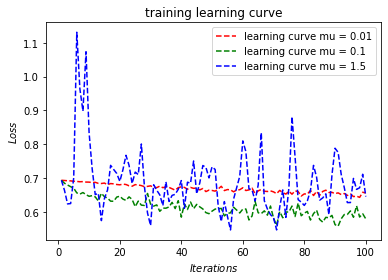

In [ ]:
w0 = np.zeros(90)
b0 = np.zeros(1)[0]

# Write your code here
mu = 0.01
(w, b, learning_curve1, val_vec1) = run_gradient_descent(w0, b0, mu)
mu = 0.1
(w, b, learning_curve2, val_vec2) = run_gradient_descent(w0, b0, mu)
mu = 1.5
(w, b, learning_curve3, val_vec3) = run_gradient_descent(w0, b0, mu)


x_axis = np.arange(1,learning_curve1.size+1)

plt.figure()
plt.plot(x_axis,learning_curve1,"r--", label='learning curve mu = 0.01')
plt.plot(x_axis,learning_curve2,"g--", label='learning curve mu = 0.1')
plt.plot(x_axis,learning_curve3,"b--", label='learning curve mu = 1.5')
plt.xlabel("$Iterations$")
plt.ylabel("$Loss$", rotation=90)
plt.legend()
plt.title('training learning curve')


**Explain and discuss your results here:**
we can see from the graph for a low $\mu$ such as $\mu = 0.01$ we will get an almost constant loss function due to the small step size.
for a big $\mu = 1.5$ we can see that we will not get a convergence because the step size is too big so the minimum point can not be found.
for $\mu = 0.1$ we can see less noisey behavior of the function with a convergence. so $\mu = 0.1$ will be the best step size.

### Part (g) -- 7%

Find the optimial value of ${\bf w}$ and $b$ using your code. Explain how you chose
the learning rate $\mu$ and the batch size. Show plots demostrating good and bad behaviours.

Starting train mu=0.001, batch_size=100.
Iter 10. [Val Acc 52%, Loss 0.781220]
Iter 20. [Val Acc 52%, Loss 0.779922]
Iter 30. [Val Acc 52%, Loss 0.778600]
Iter 40. [Val Acc 52%, Loss 0.777272]
Iter 50. [Val Acc 52%, Loss 0.775931]
Iter 60. [Val Acc 53%, Loss 0.774661]
Iter 70. [Val Acc 53%, Loss 0.773420]
Iter 80. [Val Acc 53%, Loss 0.772099]
Iter 90. [Val Acc 53%, Loss 0.770891]
Iter 100. [Val Acc 53%, Loss 0.769724]
Iter 110. [Val Acc 53%, Loss 0.768441]
Iter 120. [Val Acc 53%, Loss 0.767155]
Iter 130. [Val Acc 53%, Loss 0.765848]
Iter 140. [Val Acc 53%, Loss 0.764673]
Iter 150. [Val Acc 53%, Loss 0.763529]
Iter 160. [Val Acc 53%, Loss 0.762374]
Iter 170. [Val Acc 53%, Loss 0.761224]
Iter 180. [Val Acc 53%, Loss 0.759886]
Iter 190. [Val Acc 53%, Loss 0.758880]
Iter 200. [Val Acc 53%, Loss 0.757743]
Iter 210. [Val Acc 53%, Loss 0.756811]
Iter 220. [Val Acc 53%, Loss 0.755729]
Iter 230. [Val Acc 54%, Loss 0.754601]
Iter 240. [Val Acc 54%, Loss 0.753488]
Iter 250. [Val Acc 54%, Loss 0.7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


Iter 40. [Val Acc 68%, Loss inf]
Iter 50. [Val Acc 69%, Loss 0.632783]
Iter 60. [Val Acc 69%, Loss 0.649267]
Iter 70. [Val Acc 70%, Loss 0.615695]
Iter 80. [Val Acc 71%, Loss 0.635372]
Iter 90. [Val Acc 68%, Loss 0.662138]
Iter 100. [Val Acc 71%, Loss 0.616289]
Iter 110. [Val Acc 72%, Loss 0.604372]
Iter 120. [Val Acc 70%, Loss 0.619538]
Iter 130. [Val Acc 65%, Loss inf]
Iter 140. [Val Acc 70%, Loss 0.640065]
Iter 150. [Val Acc 70%, Loss 0.643568]
Iter 160. [Val Acc 68%, Loss 0.678384]
Iter 170. [Val Acc 70%, Loss 0.618195]
Iter 180. [Val Acc 69%, Loss 0.667882]
Iter 190. [Val Acc 70%, Loss 0.651937]
Iter 200. [Val Acc 70%, Loss 0.636386]
Iter 210. [Val Acc 68%, Loss 0.654902]
Iter 220. [Val Acc 70%, Loss 0.661738]
Iter 230. [Val Acc 70%, Loss 0.635525]
Iter 240. [Val Acc 69%, Loss inf]
Iter 250. [Val Acc 70%, Loss inf]
Iter 260. [Val Acc 71%, Loss 0.607259]
Iter 270. [Val Acc 67%, Loss 0.686512]
Iter 280. [Val Acc 68%, Loss 0.705117]
Iter 290. [Val Acc 69%, Loss 0.673165]
Iter 300. [V

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


Iter 320. [Val Acc 70%, Loss inf]
Iter 330. [Val Acc 69%, Loss 0.642226]
Iter 340. [Val Acc 69%, Loss 0.646435]
Iter 350. [Val Acc 69%, Loss 0.644399]
Iter 360. [Val Acc 69%, Loss 0.661012]
Iter 370. [Val Acc 72%, Loss 0.602573]
Iter 380. [Val Acc 70%, Loss 0.641726]
Iter 390. [Val Acc 71%, Loss 0.622271]
Iter 400. [Val Acc 70%, Loss 0.629373]
Iter 410. [Val Acc 71%, Loss 0.637994]
Iter 420. [Val Acc 66%, Loss inf]
Iter 430. [Val Acc 66%, Loss 0.747016]
Iter 440. [Val Acc 71%, Loss 0.609137]
Iter 450. [Val Acc 71%, Loss 0.631496]
Iter 460. [Val Acc 70%, Loss 0.617586]
Iter 470. [Val Acc 68%, Loss 0.667750]
Iter 480. [Val Acc 70%, Loss 0.642609]
Iter 490. [Val Acc 67%, Loss 0.708387]
Iter 500. [Val Acc 69%, Loss 0.627821]


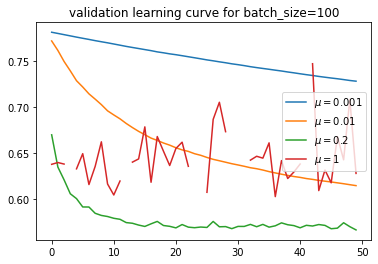

Starting train mu=0.001, batch_size=500.
Iter 10. [Val Acc 52%, Loss 0.781130]
Iter 20. [Val Acc 52%, Loss 0.779824]
Iter 30. [Val Acc 52%, Loss 0.778434]
Iter 40. [Val Acc 52%, Loss 0.777169]
Iter 50. [Val Acc 52%, Loss 0.775928]
Iter 60. [Val Acc 53%, Loss 0.774644]
Iter 70. [Val Acc 53%, Loss 0.773296]
Iter 80. [Val Acc 53%, Loss 0.771983]
Iter 90. [Val Acc 53%, Loss 0.770694]
Iter 100. [Val Acc 53%, Loss 0.769500]
Iter 110. [Val Acc 53%, Loss 0.768253]
Iter 120. [Val Acc 53%, Loss 0.766878]
Iter 130. [Val Acc 53%, Loss 0.765627]
Iter 140. [Val Acc 53%, Loss 0.764407]
Iter 150. [Val Acc 53%, Loss 0.763155]
Iter 160. [Val Acc 53%, Loss 0.761949]
Iter 170. [Val Acc 53%, Loss 0.760802]
Iter 180. [Val Acc 53%, Loss 0.759673]
Iter 190. [Val Acc 53%, Loss 0.758575]
Iter 200. [Val Acc 53%, Loss 0.757448]
Iter 210. [Val Acc 53%, Loss 0.756303]
Iter 220. [Val Acc 54%, Loss 0.755312]
Iter 230. [Val Acc 54%, Loss 0.754314]
Iter 240. [Val Acc 54%, Loss 0.753223]
Iter 250. [Val Acc 54%, Loss 0.7

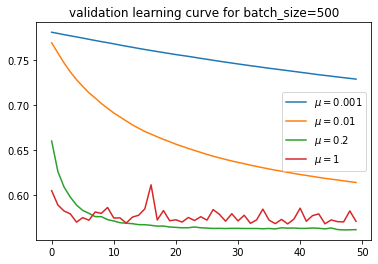

Starting train mu=0.001, batch_size=1000.
Iter 10. [Val Acc 52%, Loss 0.781040]
Iter 20. [Val Acc 52%, Loss 0.779648]
Iter 30. [Val Acc 52%, Loss 0.778284]
Iter 40. [Val Acc 52%, Loss 0.776978]
Iter 50. [Val Acc 52%, Loss 0.775712]
Iter 60. [Val Acc 53%, Loss 0.774404]
Iter 70. [Val Acc 53%, Loss 0.773182]
Iter 80. [Val Acc 53%, Loss 0.771853]
Iter 90. [Val Acc 53%, Loss 0.770570]
Iter 100. [Val Acc 53%, Loss 0.769335]
Iter 110. [Val Acc 53%, Loss 0.768067]
Iter 120. [Val Acc 53%, Loss 0.766917]
Iter 130. [Val Acc 53%, Loss 0.765658]
Iter 140. [Val Acc 53%, Loss 0.764413]
Iter 150. [Val Acc 53%, Loss 0.763170]
Iter 160. [Val Acc 53%, Loss 0.762002]
Iter 170. [Val Acc 53%, Loss 0.760875]
Iter 180. [Val Acc 53%, Loss 0.759752]
Iter 190. [Val Acc 53%, Loss 0.758559]
Iter 200. [Val Acc 53%, Loss 0.757463]
Iter 210. [Val Acc 53%, Loss 0.756370]
Iter 220. [Val Acc 53%, Loss 0.755228]
Iter 230. [Val Acc 54%, Loss 0.754123]
Iter 240. [Val Acc 54%, Loss 0.753047]
Iter 250. [Val Acc 54%, Loss 0.

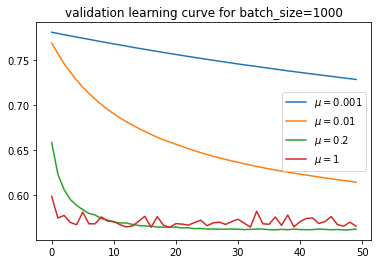

Starting train mu=0.001, batch_size=1500.
Iter 10. [Val Acc 52%, Loss 0.781107]
Iter 20. [Val Acc 52%, Loss 0.779750]
Iter 30. [Val Acc 52%, Loss 0.778392]
Iter 40. [Val Acc 52%, Loss 0.777091]
Iter 50. [Val Acc 52%, Loss 0.775709]
Iter 60. [Val Acc 53%, Loss 0.774380]
Iter 70. [Val Acc 53%, Loss 0.773045]
Iter 80. [Val Acc 53%, Loss 0.771807]
Iter 90. [Val Acc 53%, Loss 0.770551]
Iter 100. [Val Acc 53%, Loss 0.769270]
Iter 110. [Val Acc 53%, Loss 0.768022]
Iter 120. [Val Acc 53%, Loss 0.766810]
Iter 130. [Val Acc 53%, Loss 0.765561]
Iter 140. [Val Acc 53%, Loss 0.764366]
Iter 150. [Val Acc 53%, Loss 0.763188]
Iter 160. [Val Acc 53%, Loss 0.762003]
Iter 170. [Val Acc 53%, Loss 0.760868]
Iter 180. [Val Acc 53%, Loss 0.759765]
Iter 190. [Val Acc 53%, Loss 0.758623]
Iter 200. [Val Acc 53%, Loss 0.757497]
Iter 210. [Val Acc 53%, Loss 0.756390]
Iter 220. [Val Acc 53%, Loss 0.755261]
Iter 230. [Val Acc 54%, Loss 0.754179]
Iter 240. [Val Acc 54%, Loss 0.753104]
Iter 250. [Val Acc 54%, Loss 0.

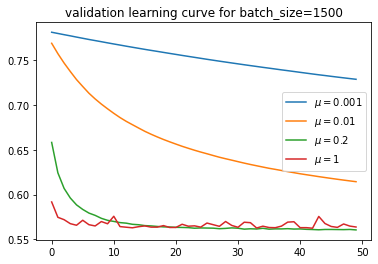

In [ ]:
w0 = 0.1*np.random.randn(90)
b0 = 0.1*np.random.randn(1)[0]

# Write your code here
batch_vec = [100, 500, 1000, 1500] # set values for batch size
mu_vec = [0.001, 0.01, 0.2, 1] # set values for mu
data = [] 
for batch in batch_vec:
  learning_curve_list = []
  for mu in mu_vec:
    print("Starting train mu=%s, batch_size=%s." %(mu, batch))
    (w, b,learning_curve,val_curve) = run_gradient_descent(w0, b0, mu, batch,500)
    data.append([w,b,learning_curve[-1]])
    learning_curve_list.append(val_curve) 
    x_tr = np.arange(1,learning_curve.size+1)

  # plot learning curves
  plt.figure()
  x_val = range(len(learning_curve_list[0]))
  for i in range(len(learning_curve_list)):
    plt.plot(x_val,learning_curve_list[i])
  plt.title(f'validation learning curve for batch_size={batch}')
  plt.legend([f'$\mu={mu_vec[0]}$', f'$\mu={mu_vec[1]}$', f'$\mu={mu_vec[2]}$', f'$\mu={mu_vec[3]}$'])
  plt.show()


In [ ]:

#finding the best b and w
dataset = sorted(data,key=lambda l:l[2])
best_w = data[0][0]
best_b = data[0][1]
print(f"the best value for b is: {best_b}")
print(f"the best value for w is: {best_w}")

the best value for b is: -0.024115915142728043
the best value for w is: [ 0.1389265   0.04075733  0.00742468 -0.01315951  0.13753088  0.06144185
  0.11771201 -0.06153965  0.02786711  0.08220169 -0.08075499 -0.18102337
 -0.05279151 -0.00238137 -0.12136721  0.03993005  0.05307684  0.08203257
 -0.0084596   0.12171253  0.0162068  -0.0213799   0.05152215  0.01122449
 -0.12327465 -0.0347186  -0.02163989  0.07342963 -0.10080966 -0.01902257
 -0.01954552  0.04896578  0.04598387 -0.00792397 -0.0669711   0.02946834
 -0.20247397 -0.09121601 -0.04907205 -0.17898813 -0.01295258 -0.02039157
 -0.10699402  0.03798566 -0.10955357  0.03386026 -0.1011633  -0.1803606
 -0.04243704 -0.10045875 -0.05897278 -0.00447524  0.02135319 -0.01206207
 -0.03809508 -0.10990044 -0.10342491 -0.13617297  0.05221522 -0.00158648
 -0.10165788 -0.02725775  0.01597673  0.02255495  0.18176616  0.16480956
 -0.17336748  0.11350802  0.22307559  0.10226021 -0.08124891 -0.00667567
  0.00945455 -0.03455639 -0.13295713 -0.06174335 -0.0

**Explain and discuss your results here:**
WE scaned over $\mu = [0.001, 0.01, 0.1, 1.5]$ and  $batch = [100, 500, 1000, 1500] $ for selecting the best hyper params for ompimal loss.
we can see that $\mu = 0.1$ and $batch = 1500$ we get the graph we are looking for. 




### Part (h) -- 15%

Using the values of `w` and `b` from part (g), compute your training accuracy, validation accuracy,
and test accuracy. Are there any differences between those three values? If so, why?

In [ ]:
# Write your code here

train=pred(best_w,best_b,train_norm_xs)
val=pred(best_w,best_b,val_norm_xs)
test=pred(best_w,best_b,test_norm_xs)

train_acc = get_accuracy(train, train_ts)
val_acc = get_accuracy(val, val_ts)
test_acc = get_accuracy(test, test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)


train_acc =  0.5547321223547611  val_acc =  0.55394  test_acc =  0.5514235909355026


**Explain and discuss your results here:**
The results we got a very close and the accuracy of the training part is the highest and test part in the lowest. 
This is because the training model trained with the training set and the test part got a "new" data.

### Part (i) -- 15%

Writing a classifier like this is instructive, and helps you understand what happens when
we train a model. However, in practice, we rarely write model building and training code
from scratch. Instead, we typically use one of the well-tested libraries available in a package.

Use `sklearn.linear_model.LogisticRegression` to build a linear classifier, and make predictions about the test set. Start by reading the
[API documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Compute the training, validation and test accuracy of this model.

In [ ]:
import sklearn.linear_model

model = sklearn.linear_model.LogisticRegression()
model.fit(train_norm_xs,train_ts)

train=model.predict(train_norm_xs)
val=model.predict(val_norm_xs)
test=model.predict(test_norm_xs)

train_acc = get_accuracy(train, train_ts)
val_acc = get_accuracy(val, val_ts)
test_acc = get_accuracy(test, test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_acc =  0.7329586792840482  val_acc =  0.73128  test_acc =  0.7265736974627155


**This parts helps by checking if the code worked.**
**Check if you get similar results, if not repair your code**
